In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df=pd.read_csv('/home/sak/DL/material/intern/Data/train.csv')

In [21]:
df.head()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,NaN,Australia,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",Peace Family Vineyard,83,10.0,Australia Other,South Eastern Australia,NaN,Andrew Peace,Chardonnay
1,@wawinereport,US,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,NaN,89,15.0,Washington,Columbia Valley (WA),Columbia Valley,North by Northwest,Red Blend
2,NaN,Italy,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,Conca,94,80.0,Piedmont,Barolo,NaN,Renato Ratti,Nebbiolo
3,@vossroger,France,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...,L'Abbaye,87,22.0,Southwest France,Bergerac Sec,NaN,Domaine l'Ancienne Cure,Bordeaux-style White Blend
4,@vossroger,France,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie...",Le Cèdre Vintage,88,33.0,France Other,Vin de Liqueur,NaN,Château du Cèdre,Malbec


In [22]:
df.describe()

,points,price
count,82657.000000,77088.000000
mean,88.544564,36.922232
std,3.099649,43.698346
min,80.000000,4.000000
25%,86.000000,18.000000
50%,88.000000,27.000000
75%,91.000000,45.000000
max,100.000000,3300.000000


In [23]:
df.isnull().sum()

user_name             19393
country                  35
review_title              0
review_description        0
designation           23647
points                    0
price                  5569
province                 35
region_1              12754
region_2              46708
winery                    0
variety                   0
dtype: int64

In [24]:
## user_name cantains almost 20,000 null values and is of no importance.So removing it
df=df.drop(['user_name'],axis=1)

In [25]:
##Exploring Dataset

In [26]:
countries_list = pd.DataFrame(df.country.value_counts(dropna = True)).iloc[0:10]
countries_list['Index'] = list(range(0,10))
countries_list['Country_Name'] = countries_list.index.values
countries_list.set_index('Index',inplace = True)
countries_list.columns = ['Number Of Wines Produced','Country']
print("Top 10 Wine Producing Countries")
countries_list

Top 10 Wine Producing Countries


,Number Of Wines Produced,Country
Index,,
0,38573,US
1,15948,France
2,9112,Italy
3,3197,Portugal
4,2891,Chile
5,2755,Spain
6,2570,Argentina
7,1892,Austria
8,1573,Germany


Text(0.5, 0, 'Number Of Wines Produced')

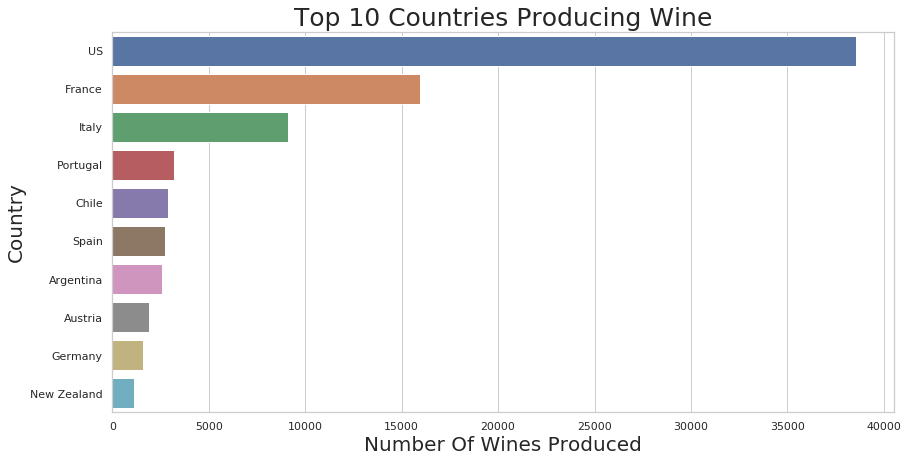

In [27]:
fig, ax = plt.subplots(figsize=(14,7))
sns.set(style="whitegrid")
ax = sns.barplot(y="Country", x="Number Of Wines Produced", data=countries_list)
plt.title("Top 10 Countries Producing Wine",fontsize = 25)
plt.ylabel("Country",fontsize = 20)
plt.xlabel("Number Of Wines Produced",fontsize = 20)

In [28]:
winery_list = pd.DataFrame(df.winery.value_counts(dropna = True)).iloc[0:10]
winery_list['Index'] = list(range(0,10))
winery_list['Winery_Name'] = winery_list.index.values
winery_list.set_index('Index',inplace = True)
winery_list.columns = ['Number Of Wines Produced','Winery']
#Top 10 Wine Producing Wineries
winery_list

,Number Of Wines Produced,Winery
Index,,
0,175,Testarossa
1,168,Louis Latour
2,165,Williams Selyem
3,163,Chateau Ste. Michelle
4,163,Georges Duboeuf
5,142,Wines & Winemakers
6,131,DFJ Vinhos
7,112,Columbia Crest
8,112,Concha y Toro


Text(0.5, 0, 'Number Of Wines Produced')

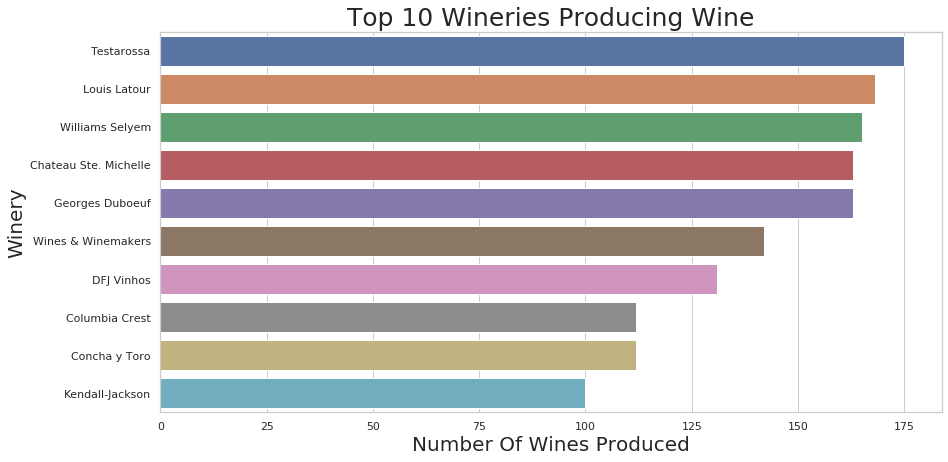

In [29]:
fig, ax = plt.subplots(figsize=(14,7))
sns.set(style="whitegrid")
sns.barplot(y="Winery", x="Number Of Wines Produced", data=winery_list)
plt.title("Top 10 Wineries Producing Wine",fontsize = 25)
plt.ylabel("Winery",fontsize = 20)
plt.xlabel("Number Of Wines Produced",fontsize = 20)

In [30]:
def price_group(pr):
    if(pr>0 and pr<30):
        return 1
    elif(pr >= 30 and pr < 80):
        return 2
    elif(pr >= 80 and pr < 150):
        return 3
    elif(pr >= 150 and pr < 500):
        return 4
    else:
        return 5

In [31]:
df['Price_Group'] = df['price'].apply(price_group)
counts = list(df['Price_Group'].value_counts())

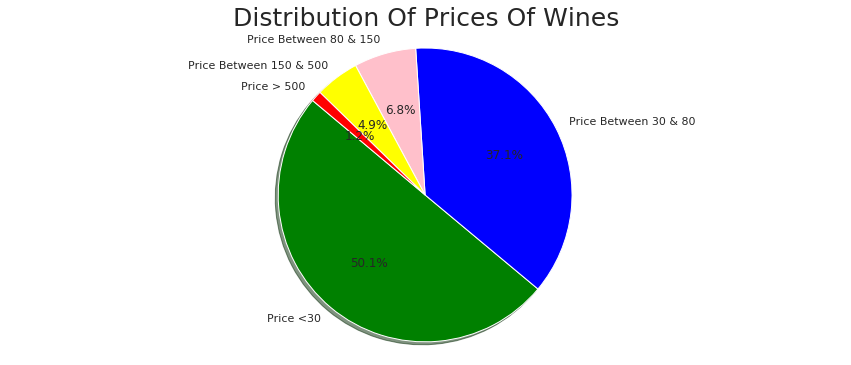

In [32]:
labels = ['Price <30','Price Between 30 & 80','Price Between 80 & 150','Price Between 150 & 500','Price > 500']
colors = ['green', 'Blue', 'pink', 'yellow','red']
plt.figure(figsize = (15,6)) 
plt.pie(counts,labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Distribution Of Prices Of Wines",fontsize = 25)
plt.axis('equal')
plt.show()

In [33]:
top_5_exp = df.groupby('country').mean().sort_values(by = ['price'],ascending = False)
top_5_exp = pd.DataFrame(top_5_exp.iloc[0:5,1])
top_5_exp['Index'] = list(range(5))
top_5_exp['Country'] = top_5_exp.index.values
top_5_exp.set_index(['Index'],inplace = True)
top_5_exp

,price,Country
Index,,
0,107.800000,Switzerland
1,50.706897,England
2,46.573810,Italy
3,43.591731,Germany
4,43.371654,France


Text(0.5, 0, 'Price')

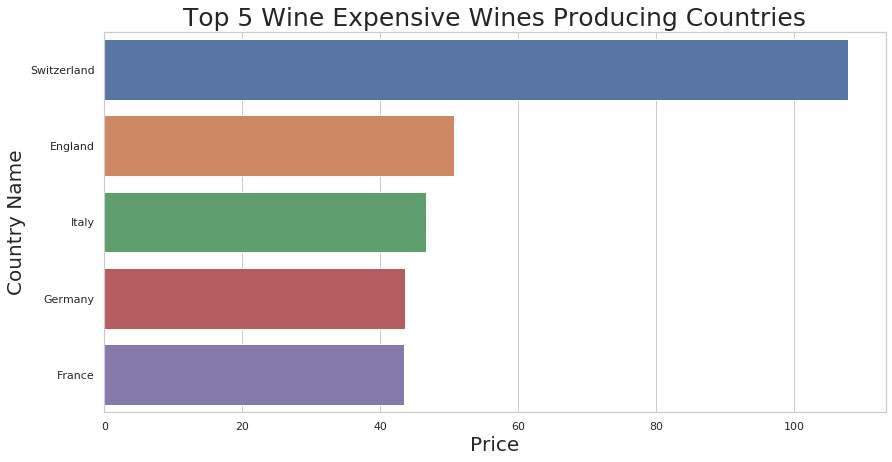

In [34]:
fig, ax = plt.subplots(figsize=(14,7))
sns.set(style="whitegrid")
ax = sns.barplot(y="Country", x="price", data=top_5_exp)
plt.title("Top 5 Wine Expensive Wines Producing Countries",fontsize = 25)
plt.ylabel("Country Name",fontsize = 20)
plt.xlabel("Price",fontsize = 20)

In [35]:
top_5_cheap = df.groupby('country').mean().sort_values(by = ['price'],ascending = True)
top_5_cheap = pd.DataFrame(top_5_cheap.iloc[0:5,1])
top_5_cheap['Index'] = list(range(5))
top_5_cheap['Country'] = top_5_cheap.index.values
top_5_cheap.set_index(['Index'],inplace = True)
top_5_cheap


,price,Country
Index,,
0,9.272727,Ukraine
1,12.000000,India
2,12.400000,Romania
3,12.916667,Georgia
4,13.875000,Peru


Text(0.5, 0, 'Price')

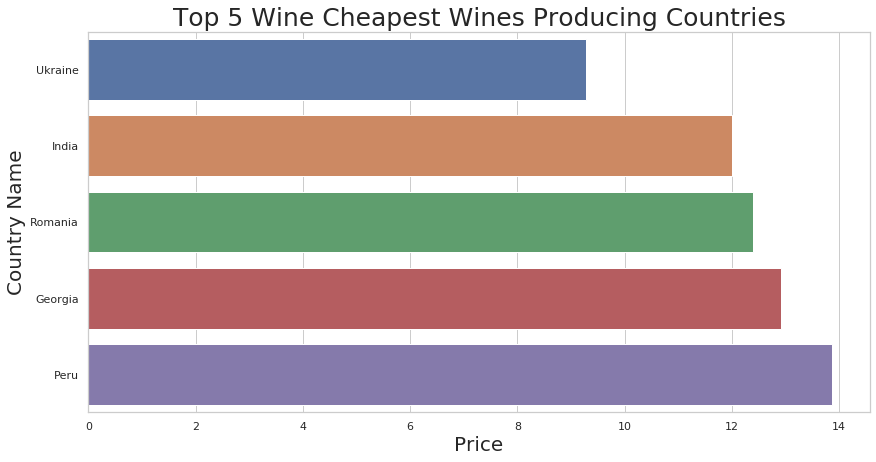

In [36]:
fig, ax = plt.subplots(figsize=(14,7))
sns.set(style="whitegrid")
ax = sns.barplot(y="Country", x="price", data=top_5_cheap)
plt.title("Top 5 Wine Cheapest Wines Producing Countries",fontsize = 25)
plt.ylabel("Country Name",fontsize = 20)
plt.xlabel("Price",fontsize = 20)

### TASK -2 Building a predictive model for predicting the wine “variety”.

In [37]:
df.head()

,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety,Price_Group
0,Australia,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",Peace Family Vineyard,83,10.0,Australia Other,South Eastern Australia,NaN,Andrew Peace,Chardonnay,1
1,US,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,NaN,89,15.0,Washington,Columbia Valley (WA),Columbia Valley,North by Northwest,Red Blend,1
2,Italy,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,Conca,94,80.0,Piedmont,Barolo,NaN,Renato Ratti,Nebbiolo,3
3,France,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...,L'Abbaye,87,22.0,Southwest France,Bergerac Sec,NaN,Domaine l'Ancienne Cure,Bordeaux-style White Blend,1
4,France,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie...",Le Cèdre Vintage,88,33.0,France Other,Vin de Liqueur,NaN,Château du Cèdre,Malbec,2


In [113]:
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder
import nltk
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import tensorflow as tf
from keras.layers import Dense
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from nltk.tokenize.toktok import ToktokTokenizer


In [114]:
## Combining review title and review description to form a single column

df['new']=df['review_title']+(df['review_description'])

In [115]:
df['new'].head()

0    Andrew Peace 2007 Peace Family Vineyard Chardo...
1    North by Northwest 2014 Red (Columbia Valley (...
2    Renato Ratti 2007 Conca  (Barolo)Barolo Conca ...
3    Domaine l'Ancienne Cure 2010 L'Abbaye White (B...
4    Château du Cèdre 2012 Le Cèdre Vintage Malbec ...
Name: new, dtype: object

In [116]:
y=df['variety']    ##y:-Our Target Variable

In [117]:
## Converting wine varieties into numerical values 
le=LabelEncoder()
y=le.fit_transform(y)

In [118]:
x=df['new']

In [119]:
toktok=ToktokTokenizer()
for i in range(len(x)):
    words=[]
    token=toktok.tokenize(x[i])  #Converting to tokens
    for j in token:
        j=j.lower()              #Converting each token to lower form
        if(j not in nltk.corpus.stopwords.words('english')):  #Removing stopwords
            if(j.isalpha()):       #Removing punctuations,special characters,numbers,etc and keeping only character tokens
                words.append(j)
    x[i]=" ".join(words)

/home/sak/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [120]:
## Using Tf-idf for vectorisation
tfidf = TfidfVectorizer(min_df=10)
x = tfidf.fit_transform(x)

In [122]:
## Splitting the data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=123)


In [123]:
model = Sequential()
model.add(Dense(200, activation='relu', input_dim=len(tfidf.get_feature_names())))
#model.add(Dense(300,activation='relu'))
#model.add(Dense(100,activation='relu'))
model.add(Dense(units=y.max()+1, activation='sigmoid'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=2,verbose=1)
#histroy=model.fit(X_train, y_train, epochs=2, verbose=1)

Train on 66125 samples, validate on 16532 samples
Epoch 1/2
66125/66125 [==============================] - 89s 1ms/step - loss: 0.6063 - acc: 0.8576 - val_loss: 0.1733 - val_acc: 0.9491
Epoch 2/2
66125/66125 [==============================] - 81s 1ms/step - loss: 0.0960 - acc: 0.9723 - val_loss: 0.1556 - val_acc: 0.9504


In [124]:
def visualize_model(history):
    plt.figure(figsize=(24,8))
    plt.subplot(1,2,1)
    plt.plot(history.history["val_acc"],label="validation_accuracy",c="red",linewidth=4)
    plt.plot(history.history["acc"],label="training_accuracy",c="green",linewidth=4)
    plt.legend()
    plt.grid(True)
    
    plt.subplot(1,2,2)
    plt.plot(history.history["val_loss"],label="validation loss",c="red",linewidth=4)
    plt.plot(history.history["loss"],label="training_loss",c="green",linewidth=4)
    plt.legend()
    plt.grid(True)
    plt.suptitle("ACC / LOSS",fontsize=18)

    plt.show()

In [126]:
model.save('final.h5')

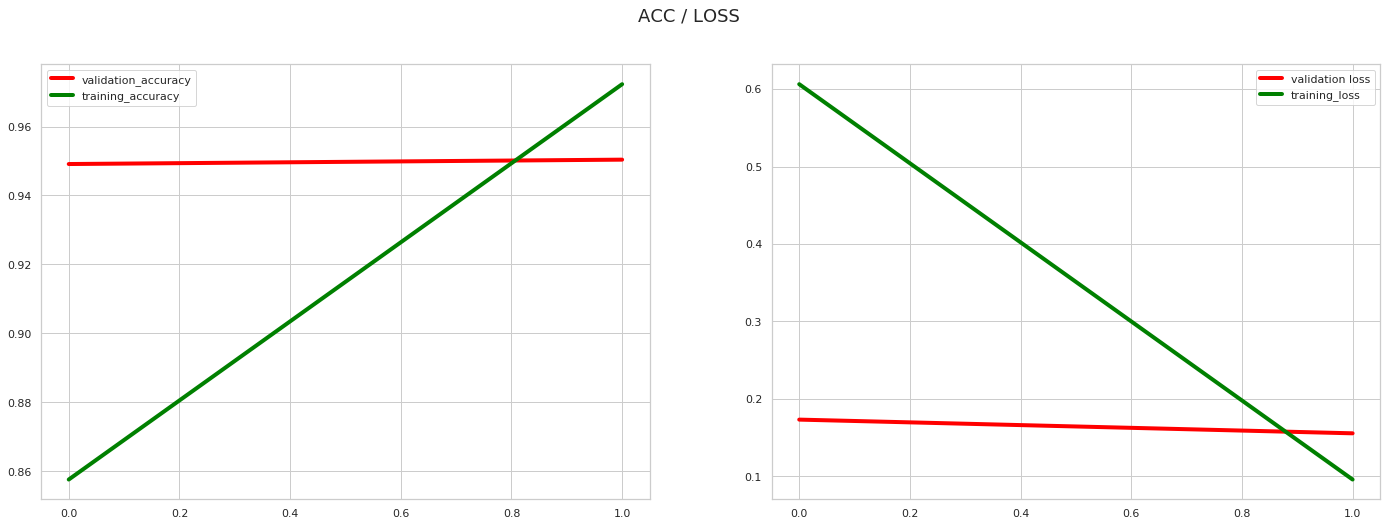

In [127]:
visualize_model(history)  ##Visualising validation and accuracy

## Loading test set ,
## Prediction on a test sample

In [168]:
test=pd.read_csv('/home/sak/DL/material/intern/Data/test.csv')

In [169]:
test.drop('user_name',axis=1)

,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery
0,US,Boedecker Cellars 2011 Athena Pinot Noir (Will...,Nicely differentiated from the companion Stewa...,Athena,88,35.0,Oregon,Willamette Valley,Willamette Valley,Boedecker Cellars
1,Argentina,Mendoza Vineyards 2012 Gran Reserva by Richard...,"Charred, smoky, herbal aromas of blackberry tr...",Gran Reserva by Richard Bonvin,90,60.0,Mendoza Province,Mendoza,NaN,Mendoza Vineyards
2,US,Prime 2013 Chardonnay (Coombsville),"Slightly sour and funky in earth, this is a re...",NaN,87,38.0,California,Coombsville,Napa,Prime
3,Argentina,Bodega Cuarto Dominio 2012 Chento Vineyard Sel...,"This concentrated, midnight-black Malbec deliv...",Chento Vineyard Selection,91,20.0,Mendoza Province,Mendoza,NaN,Bodega Cuarto Dominio
4,Italy,SassodiSole 2012 Brunello di Montalcino,"Earthy aromas suggesting grilled porcini, leat...",NaN,90,49.0,Tuscany,Brunello di Montalcino,NaN,SassodiSole
...,...,...,...,...,...,...,...,...,...,...
20660,US,Yorkville Cellars 2013 Rennie Vineyard Caberne...,"Clearly focused and fruit-driven, this wine ha...",Rennie Vineyard,91,34.0,California,Yorkville Highlands,North Coast,Yorkville Cellars
20661,France,Château Ribaute 2015 Senhal d'Aric Rosé (Corbi...,Herbal tones of bay and rosemary are upfront o...,Senhal d'Aric,84,20.0,Languedoc-Roussillon,Corbières,NaN,Château Ribaute
20662,US,Daou 2014 Reserve Cabernet Sauvignon (Paso Rob...,"Mocha cream, pencil shaving and dried herb aro...",Reserve,94,85.0,California,Paso Robles,Central Coast,Daou
20663,Spain,Peñascal 2011 Tempranillo Rosé (Vino de la Tie...,Loud citrus and berry aromas precede an overlo...,Tempranillo,80,9.0,Northern Spain,Vino de la Tierra de Castilla y León,NaN,Peñascal


In [170]:
## Pre Processing for test sample
test['new']=test['review_description']+test['review_title']
sample=test['new'][0]
toktok=ToktokTokenizer()
words=[]
token=toktok.tokenize(sample)
s=""
for j in token:
    j=j.lower()              #Converting each token to lower form
    if(j not in nltk.corpus.stopwords.words('english')):  #Removing stopwords
        if(j.isalpha()):       #Removing punctuations,special characters,numbers,etc and keeping only character tokens
            words.append(j)
s=" ".join(words)
final_sample = tfidf.transform([s])

In [175]:
out=model.predict_classes(final_sample)

In [176]:
out  ##Prediction by model in encoded form

array([14])

In [178]:
le.inverse_transform(out)[0]    ##Decoding using Label Encoder which is used earlier to encode

'Pinot Noir'